# Predicting movie's IMDB rating using Machine Learning algorithms

This notebook aims at predicting IMDB ratings for the movies dataset, by creating Machine Learning & Deep Learning Models for predictive analytics and comparing evaluation metric for regression.

** Data Source**

https://github.com/sundeepblue/movie_rating_prediction/blob/master/movie_metadata.csv

** Tools & Libraries used**

1. `Python`, Python's libraries `Numpy`, `Pandas`, `Scikit-learn` for classical Machine Learning models

2. `TensorFlow` and `Keras` for Deep Learning models

3. `Matplotlib` and `Seaborn` for statistical data visualization 

## Contents

1. Loading the libraries & data
2. Data Preprocessing : NA values
3. Data Preprocessing : Visualizing Feature Distribution
4. Data Preprocessing : Feature engineering/Trim down categorical features
5. Data Preprocessing : Categorical Encoding
6. Data Preprocessing : Feature Scaling
7. Data Preprocessing : Train_test Split
8. Deep Learning using TensorFlow and Keras
9. Deep Learning using Keras
10. Classical Machine Learning algorithms:

      10.1. Linear Regression
      
      10.2. Decision Tree regression
      
      10.3. RandomForests regression
      
      10.4. Support Vector Machines regression
      
11. Concluding Remarks

## 1. Loading the libraries & data

Lets begin by importing the basic libraries

In [1]:
# Importing the libraries
import numpy as np
np.random.seed(1234)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
plt.style.use('ggplot')
%matplotlib inline

Now read in the dataset from the URL, using pandas

In [2]:
# Importing the dataset
movies = pd.read_csv('https://raw.githubusercontent.com/sundeepblue/movie_rating_prediction/master/movie_metadata.csv')

Observe the first few rows of the data

In [3]:
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

**Observations**
1. The data has a total of 5043 entries, spanning 28 columns.
2. There are 12 categorical variables, requiring one-hot encoding.
3. Some rows of the dataframe contains some NA values which needs removal.
4. The target/dependent variable for predictions is `imdb_score` which is continuous and hence needs to buid regression models. 

## 2. Data Preprocessing : NA values

Analysing the count of non-null values in features

In [5]:
movies.count().sort_values()

gross                        4159
budget                       4551
aspect_ratio                 4714
content_rating               4740
plot_keywords                4890
title_year                   4935
director_name                4939
director_facebook_likes      4939
num_critic_for_reviews       4993
actor_3_facebook_likes       5020
actor_3_name                 5020
num_user_for_reviews         5022
color                        5024
duration                     5028
facenumber_in_poster         5030
actor_2_name                 5030
actor_2_facebook_likes       5030
language                     5031
actor_1_facebook_likes       5036
actor_1_name                 5036
country                      5038
imdb_score                   5043
cast_total_facebook_likes    5043
num_voted_users              5043
movie_title                  5043
genres                       5043
movie_imdb_link              5043
movie_facebook_likes         5043
dtype: int64

**Upon inspection**
1. The `gross` variable seems to have the most number of missing values, the percentage being 884/5043 = 17 %. 
2. The variable `country` has the least number of NA values, the count being 5.

Lets drop the rows with missing values

In [6]:
movies.dropna(inplace=True)

In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 28 columns):
color                        3756 non-null object
director_name                3756 non-null object
num_critic_for_reviews       3756 non-null float64
duration                     3756 non-null float64
director_facebook_likes      3756 non-null float64
actor_3_facebook_likes       3756 non-null float64
actor_2_name                 3756 non-null object
actor_1_facebook_likes       3756 non-null float64
gross                        3756 non-null float64
genres                       3756 non-null object
actor_1_name                 3756 non-null object
movie_title                  3756 non-null object
num_voted_users              3756 non-null int64
cast_total_facebook_likes    3756 non-null int64
actor_3_name                 3756 non-null object
facenumber_in_poster         3756 non-null float64
plot_keywords                3756 non-null object
movie_imdb_link              3756 non-

## Data Preprocessing : Visualizing Feature Distribution

Lets take a look at a summary of all the numeric variables

In [8]:
movies.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3.756000e+03,3.756000e+03,3756.000000,3756.000000,3756.000000,3.756000e+03,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000
mean,167.378328,110.257987,807.336528,771.279553,7751.338658,5.261282e+07,1.058267e+05,11527.101970,1.377263,336.843184,4.623685e+07,2002.976571,2021.775825,6.465282,2.111014,9353.829340
std,123.452040,22.646717,3068.171683,1894.249869,15519.339621,7.031787e+07,1.520354e+05,19122.176905,2.041541,411.227368,2.260103e+08,9.888108,4544.908236,1.056247,0.353068,21462.889123
min,2.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,9.100000e+01,0.000000,0.000000,4.000000,2.180000e+02,1927.000000,0.000000,1.600000,1.180000,0.000000
25%,77.000000,96.000000,11.000000,194.000000,745.000000,8.270233e+06,1.966700e+04,1919.750000,0.000000,110.000000,1.000000e+07,1999.000000,384.750000,5.900000,1.850000,0.000000
50%,138.500000,106.000000,64.000000,436.000000,1000.000000,3.009311e+07,5.397350e+04,4059.500000,1.000000,210.000000,2.500000e+07,2004.000000,685.500000,6.600000,2.350000,227.000000
75%,224.000000,120.000000,235.000000,691.000000,13000.000000,6.688194e+07,1.286020e+05,16240.000000,2.000000,398.250000,5.000000e+07,2010.000000,976.000000,7.200000,2.350000,11000.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.300000,16.000000,349000.000000


Now lets visualize the distribution of numeric feature attributes

**1. `imdb_score`: target variable, numeric**

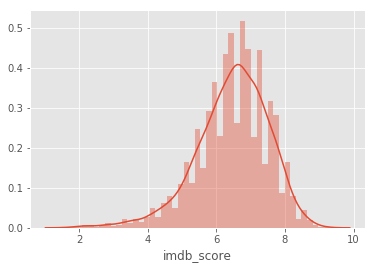

In [9]:
sb.distplot(movies["imdb_score"])

The target variable has a nice normal distribution

**2. `director_facebook_likes`: feature variable, numeric**

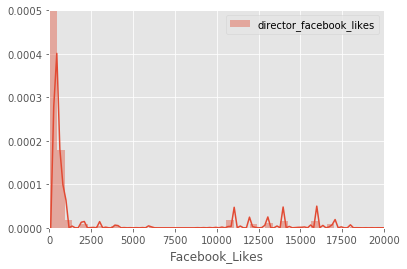

In [10]:
plt.figure()
sb.distplot(movies["director_facebook_likes"], label="director_facebook_likes")
plt.legend()
plt.xlabel("Facebook_Likes")
plt.xlim(0,20000);plt.ylim(0, 0.0005)
plt.show()

The variable is distributed all over the place, needs feature scaling

**3. `actor_facebook_likes`: feature variables, numeric**

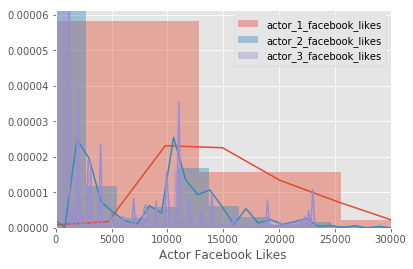

In [11]:
plt.figure()
sb.distplot(movies["actor_1_facebook_likes"], label="actor_1_facebook_likes")
sb.distplot(movies["actor_2_facebook_likes"], label="actor_2_facebook_likes")
sb.distplot(movies["actor_3_facebook_likes"], label="actor_3_facebook_likes")
plt.legend();plt.xlabel("Actor Facebook Likes")
plt.xlim(0,30000);
plt.show()

Again, Actor's Facebook likes are distributed all over the place, need feature scaling

**4. `cast_total_facebook_likes`, `movie_facebook_likes`: feature variables, numeric**

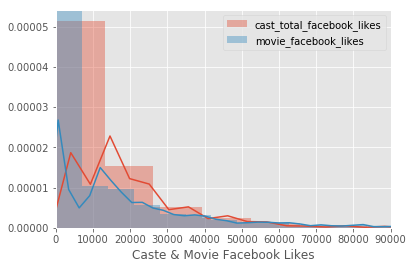

In [12]:
plt.figure()
sb.distplot(movies["cast_total_facebook_likes"], label="cast_total_facebook_likes")
sb.distplot(movies["movie_facebook_likes"], label="movie_facebook_likes")
plt.legend();plt.xlabel("Caste & Movie Facebook Likes")
plt.xlim(0,90000);plt.show()

Observe that Caste and Movie Facebook Likes bears more or less similar statistical distribution curves

**5. `num_critic_for_reviews`, `num_voted_users`, `num_user_for_reviews`: feature variables, numeric**

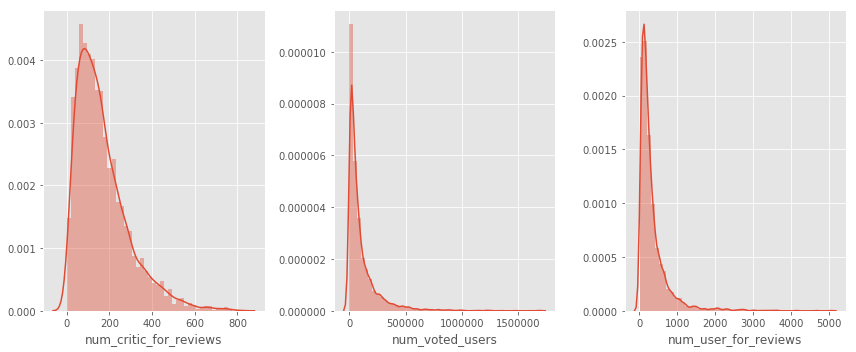

In [13]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
sb.distplot(movies["num_critic_for_reviews"], label="num_critic_for_reviews")
plt.subplot(1,3,2)
sb.distplot(movies["num_voted_users"], label="num_voted_users")
plt.subplot(1,3,3)
sb.distplot(movies["num_user_for_reviews"], label="num_user_for_reviews")
plt.tight_layout()
plt.show()

It is clear that the above features are not identically distributed, they do have significant variation among themselves. Lets include all of them in our models assuming they might contribute to predicting the `imdb_score`

**6. `duration`, `gross`, `budget`, `aspect_ratio`: feature variables, numeric**

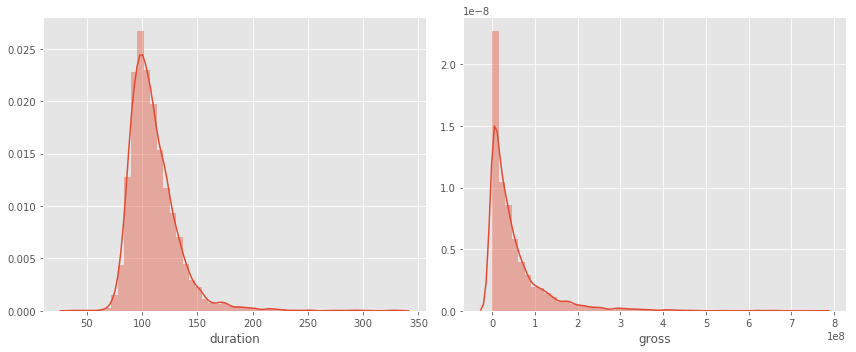

In [14]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sb.distplot(movies["duration"], label="duration")
plt.subplot(1,2,2)
sb.distplot(movies["gross"], label="gross")
plt.tight_layout()
plt.show()

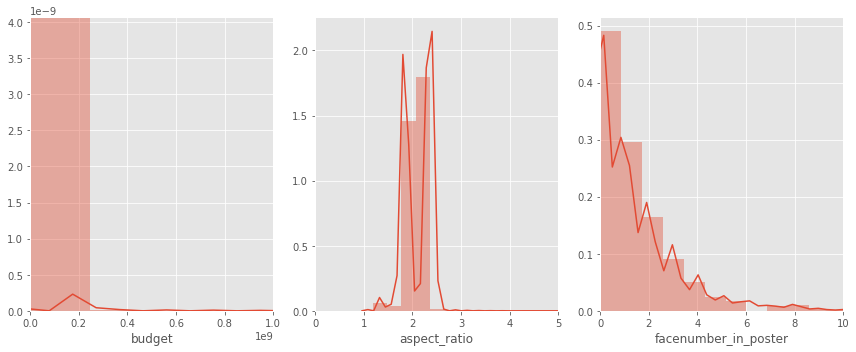

In [15]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
sb.distplot(movies["budget"], label="budget")
plt.xlim(0,0.1e10)
plt.subplot(1,3,2)
sb.distplot(movies["aspect_ratio"], label="aspect_ratio")
plt.xlim(0,5)
plt.subplot(1,3,3)
sb.distplot(movies["facenumber_in_poster"])
plt.xlim(0,10)
plt.tight_layout()
plt.show()

As is evidents from the plots, the above features possess high variance between themselves and might have some stories to tell. So lets include all of them in the model.

## Data Preprocessing : Feature engineering/Trimming down categorical features

As with categorical variables, once they are one-hot encoded, tend to explode the feature space dimension. So lets anlayse each of them and trim down to reduced number of levels, if needed. The idea is to analyse the count plot of categories in each, and club together those with lesser numbers to a single category.

**1. `color`, feature variable, categorical **

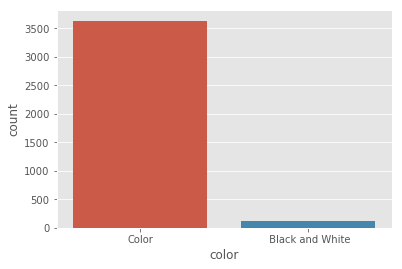

In [16]:
sb.countplot(movies["color"])

The `color` feature has only two levels as above, with the Color level in huge numbers as expected. This does not inflate the feature space, so no trimming down required

**2. `content_rating`, feature variable, categorical **

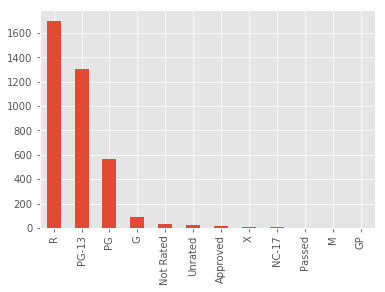

In [17]:
movies["content_rating"].value_counts().plot(kind ='bar', grid = True)

Lets include `content_rating` variable as it has fewer categories 

**3. `country`, feature variable, categorical **

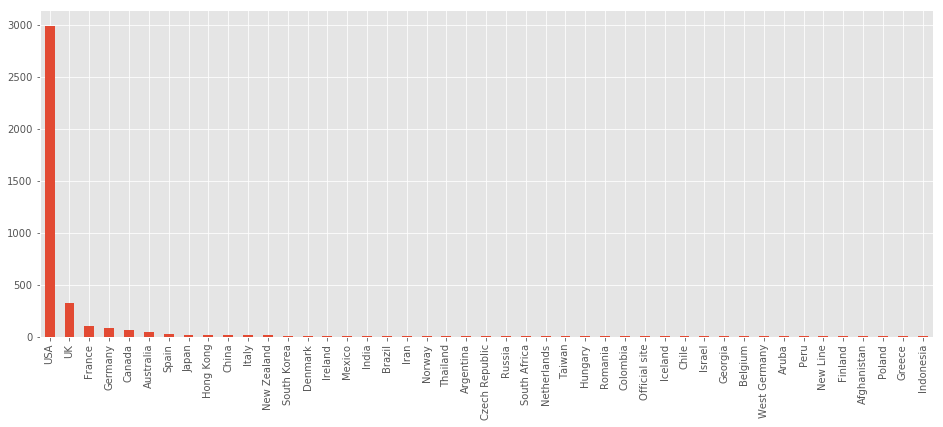

In [18]:
plt.figure(figsize =(16,6))
movies["country"].value_counts().plot(kind ='bar', grid = True)

Observe that for the `country` variable has too many levels, all of which if one-hot encoded can inflate the total number of variables. So the idea is to retain only those the levels having considerably large counts and trim down the rest (showing least amount of variability) into a single category, say `others`. Here, lets pick USA, UK, France, Germany and Canada, and categorize the rest to `others` level.

In [19]:
Country = []
list = ['USA','UK','France','Germany','Canada']
for item in movies['country']:
    if item not in list :
        Country.append('Others')
    else:
        Country.append(item)

In [20]:
movies["country"] = Country

In [21]:
movies["country"].value_counts()

USA        2987
UK          318
Others      211
France      101
Germany      80
Canada       59
Name: country, dtype: int64

This trims down our `country` variable to just 6 categories

**4. `title_year`, feature variable, categorical **

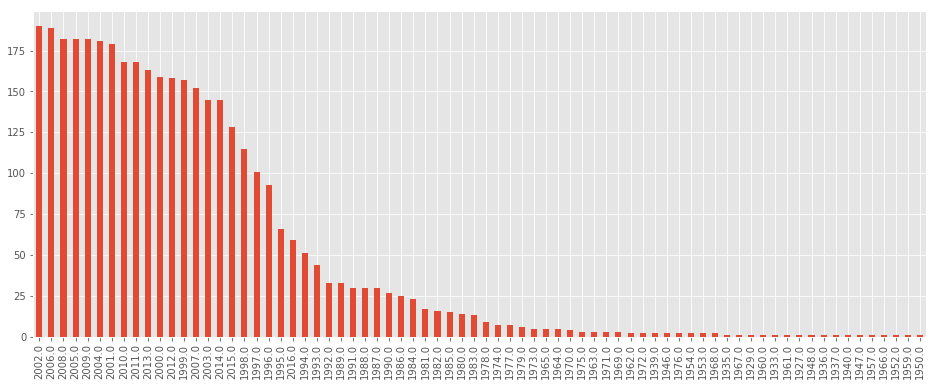

In [22]:
plt.figure(figsize =(16,6))
movies["title_year"].value_counts().plot(kind = 'bar', grid = True)

There are too many levels for the `title_year` variable, so lets create 4 categories based on title_year: Categ 1 : before 1970, Categ 2 : between 1970 and 1990, Categ 3 : between 1990 and 2010, Categ 4 : after 2010. 

In [23]:
Year_Categ = []
for item in movies['title_year']:
    if item <= 1970 :
        Year_Categ.append('categ1')
    elif item <= 1990:
        Year_Categ.append('categ2')
    elif item <= 2010:
        Year_Categ.append('categ3')
    else:
        Year_Categ.append('categ4')

In [24]:
len(Year_Categ)

3756

In [25]:
movies['title_year'] = Year_Categ

In [26]:
movies['title_year'].value_counts()

categ3    2599
categ4     821
categ2     287
categ1      49
Name: title_year, dtype: int64

Thus our `title_year` variable is reduced to four categories

**4. `language`, feature variable, categorical **

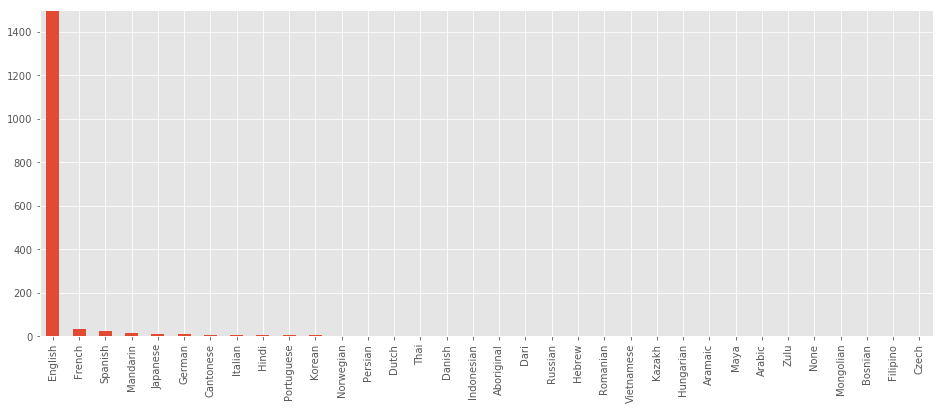

In [27]:
plt.figure(figsize =(16,6))
plt.ylim(0,1500)
movies["language"].value_counts().plot(kind ='bar', grid =True)

The `language` variable needs to be trimmed down just like the country variable. Lets choose English, French, Spanish and Mandarin and Others

In [28]:
Language = []
list = ['English', 'French', 'Spanish','Mandarin']
for item in movies['language']:
    if item not in list :
        Language.append('Others')
    else:
        Language.append(item)

In [29]:
len(Language)

3756

In [30]:
movies['language'] = Language

**5.`genres, plot_keywords, actor_1_name,actor_2_name, actor_3_name`**

In [31]:
movies["plot_keywords"].value_counts()

alien friendship|alien invasion|australia|flying car|mother daughter relationship         3
eighteen wheeler|illegal street racing|truck|trucker|undercover cop                       3
animal name in title|ape abducts a woman|gorilla|island|king kong                         3
1940s|child hero|fantasy world|orphan|reference to peter pan                              3
halloween|masked killer|michael myers|slasher|trick or treat                              3
assistant|experiment|frankenstein|medical student|scientist                               3
duchess|illusionist|magician|prince|supernatural power                                    2
coma|mysterious villain|police chase|shooting range|sniper                                2
outcast|prom|self injury|telekinesis|tragic event                                         2
bible quote|chaos|faith|riot|shrine                                                       2
ghost|ghostbuster|ghostbusters|male objectification|reboot                      

In [32]:
movies["actor_1_name"].value_counts() 

Robert De Niro            42
Johnny Depp               39
Nicolas Cage              31
J.K. Simmons              31
Denzel Washington         30
Bruce Willis              29
Matt Damon                28
Liam Neeson               26
Robert Downey Jr.         26
Harrison Ford             25
Jason Statham             25
Robin Williams            25
Tom Hanks                 24
Steve Buscemi             24
Tom Cruise                24
Keanu Reeves              24
Bill Murray               24
Morgan Freeman            22
Christian Bale            22
Kevin Spacey              22
Leonardo DiCaprio         21
Hugh Jackman              21
Will Ferrell              20
Matthew McConaughey       20
Gerard Butler             19
Will Smith                19
Dwayne Johnson            19
Scarlett Johansson        19
Anthony Hopkins           18
Philip Seymour Hoffman    17
                          ..
Alessandro Nivola          1
Tzi Ma                     1
Honor Blackman             1
Eddie Cahill  

In [33]:
movies['director_name'].value_counts()

Steven Spielberg         25
Woody Allen              19
Clint Eastwood           19
Ridley Scott             17
Tim Burton               16
Steven Soderbergh        16
Martin Scorsese          16
Renny Harlin             15
Spike Lee                15
John Carpenter           13
Robert Rodriguez         13
Barry Levinson           13
Oliver Stone             13
Robert Zemeckis          13
Ron Howard               13
Michael Bay              13
Shawn Levy               12
Tony Scott               12
Sam Raimi                12
Wes Craven               12
Joel Schumacher          12
Richard Linklater        11
Chris Columbus           11
Rob Cohen                11
Rob Reiner               11
Peter Jackson            11
Paul W.S. Anderson       10
Kevin Smith              10
David Fincher            10
Brett Ratner             10
                         ..
Gonzalo López-Gallego     1
Allen Coulter             1
Rich Cowan                1
Joseph Sargent            1
Duke Johnson        

Observe that variables `genres`,  `plot_keywords`,  `actor_1_name`, `actor_2_name`, `actor_3_name`, `director_name`,  `movie_title`  and `movie_imdb_link`  has too many categories to deal with. Lets omit them for the sake of simplicity.

## Data Preprocessing : Categorical Encoding

The recipes for the DataFrame is ready. Lets now create X (the features) and y(target) variables.

In [34]:
X = movies.drop(['genres', 'plot_keywords', 'director_name','actor_1_name','actor_2_name', 'actor_3_name','movie_title','imdb_score','movie_imdb_link'], axis = 1)
y = movies['imdb_score']

Now one-hot encode the categorical variables using the `get_dummies` in Pandas

In [35]:
categorical = ['color','content_rating', 'country','title_year', 'language']
categorical_variables = categorical
X = pd.get_dummies(X, columns = categorical_variables)

In [36]:
X.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,country_USA,title_year_categ1,title_year_categ2,title_year_categ3,title_year_categ4,language_English,language_French,language_Mandarin,language_Others,language_Spanish
count,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3.756000e+03,3.756000e+03,3756.000000,3756.000000,3756.000000,...,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000
mean,167.378328,110.257987,807.336528,771.279553,7751.338658,5.261282e+07,1.058267e+05,11527.101970,1.377263,336.843184,...,0.795261,0.013046,0.076411,0.691960,0.218584,0.957934,0.009052,0.003994,0.022897,0.006124
std,123.452040,22.646717,3068.171683,1894.249869,15519.339621,7.031787e+07,1.520354e+05,19122.176905,2.041541,411.227368,...,0.403565,0.113486,0.265690,0.461745,0.413340,0.200767,0.094724,0.063077,0.149594,0.078023
min,2.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,9.100000e+01,0.000000,0.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,77.000000,96.000000,11.000000,194.000000,745.000000,8.270233e+06,1.966700e+04,1919.750000,0.000000,110.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,138.500000,106.000000,64.000000,436.000000,1000.000000,3.009311e+07,5.397350e+04,4059.500000,1.000000,210.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,224.000000,120.000000,235.000000,691.000000,13000.000000,6.688194e+07,1.286020e+05,16240.000000,2.000000,398.250000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We are thus finally left with a total of 43 features in the feature space, X.

## Data Preprocessing : Feature Scaling

Since the domain of feature variables is wide, feature scaling is necessary for better performance of our algorithms. Lets use a `StandardScaler`

In [37]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

## Deep Learning for Regression using TensorFlow in Keras

Lets split the scaled data into training and test sets. For Deep Learning, lets give a split in the ratio 95%:5%

In [57]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 1234)

In [58]:
learning_rate = 0.001
num_epochs = 100
n_input = 32
n_hidden = 6

Now import tensorflow, its high-level wrapper, Keras and other libraries

In [61]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers.normalization import BatchNormalization
tf.logging.set_verbosity(tf.logging.INFO)

In [62]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (3568, 43)
Shape of y_train:  (3568,)
Shape of X_test:  (188, 43)
Shape of y_test:  (188,)


In [63]:
# create model
model = Sequential()
model.add(Dense(32, input_dim=43, activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(rate = 0.5))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='linear'))
# Compile model
model.compile(loss='mse',metrics=['mse'],optimizer='adam')

In [64]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                1408      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 198       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 1,741
Trainable params: 1,677
Non-trainable params: 64
_________________________________________________________________


In [65]:
history = model.fit(np.array(X_train), np.array(y_train), epochs=100, batch_size=40, verbose=1)

Epoch 1/100
3568/3568 [==============================] - 1s 202us/step - loss: 24.8700 - mean_squared_error: 24.8700
Epoch 2/100
3568/3568 [==============================] - 1s 146us/step - loss: 8.5437 - mean_squared_error: 8.5437
Epoch 3/100
3568/3568 [==============================] - 0s 131us/step - loss: 3.1292 - mean_squared_error: 3.1292
Epoch 4/100
3568/3568 [==============================] - 1s 145us/step - loss: 2.2187 - mean_squared_error: 2.2187
Epoch 5/100
3568/3568 [==============================] - ETA: 0s - loss: 1.6984 - mean_squared_error: 1.69 - 0s 132us/step - loss: 1.7022 - mean_squared_error: 1.7022
Epoch 6/100
3568/3568 [==============================] - 0s 120us/step - loss: 1.5986 - mean_squared_error: 1.5986
Epoch 7/100
3568/3568 [==============================] - 0s 120us/step - loss: 1.3653 - mean_squared_error: 1.3653
Epoch 8/100
3568/3568 [==============================] - 1s 143us/step - loss: 1.3308 - mean_squared_error: 1.3308
Epoch 9/100
3568/3568 [===

Epoch 71/100
3568/3568 [==============================] - 1s 149us/step - loss: 0.5277 - mean_squared_error: 0.5277
Epoch 72/100
3568/3568 [==============================] - 1s 143us/step - loss: 0.5148 - mean_squared_error: 0.5148
Epoch 73/100
3568/3568 [==============================] - 1s 146us/step - loss: 0.5217 - mean_squared_error: 0.5217
Epoch 74/100
3568/3568 [==============================] - 1s 165us/step - loss: 0.5130 - mean_squared_error: 0.5130
Epoch 75/100
3568/3568 [==============================] - 0s 135us/step - loss: 0.5173 - mean_squared_error: 0.5173
Epoch 76/100
3568/3568 [==============================] - 1s 141us/step - loss: 0.5129 - mean_squared_error: 0.5129
Epoch 77/100
3568/3568 [==============================] - 1s 153us/step - loss: 0.5161 - mean_squared_error: 0.5161
Epoch 78/100
3568/3568 [==============================] - 0s 131us/step - loss: 0.5087 - mean_squared_error: 0.5087
Epoch 79/100
3568/3568 [==============================] - 1s 163us/step 

In [66]:
scores = model.evaluate(np.array(X_test), np.array(y_test), verbose=1)
print("Mean Squared Error(MSE) of the test set: {:.3f} ".format(scores[1]))

188/188 [==============================] - 0s 213us/step
Mean Squared Error(MSE) of the test set: 0.597 


Observe that the training mse after 100 epochs and test mse are nearly close in values. So, there is no potential overfitting

## Classical Machine Learning algorithms

We will build and evaluate the following models upon the same data, for comparison:
1. Linear Regression
2. Support Vector Regression (Linear Kernel)
3. Support Vector Regression (rbf kernel)
4. Decision Tree Regression
5. Random Forests Regression

For these models lets create a new 80%-20% split into training and testing. The evaluation metric considered is the mean squared error

In [67]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Linear Regression

In [69]:
# LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)
#Making Predictions
y_pred_linear_reg = linear_reg.predict(X_test)

from sklearn.metrics import mean_squared_error
mselr = mean_squared_error(y_test, y_pred_linear_reg)
print("Mean Squared Error(MSE) of the test set: {:.3f} ".format(mselr))

Mean Squared Error(MSE) of the test set: 0.724 


### Support Vector Regression

In [70]:
# Fitting Support Vector Regression (rbf Kernel) to the data
from sklearn.svm import SVR
sv_reg = SVR(kernel ='rbf')
sv_reg.fit(X_train, y_train.ravel())
    
y_pred_svreg = sv_reg.predict(X_test)
from sklearn.metrics import mean_squared_error
msesvrr = mean_squared_error(y_test, y_pred_svreg)
print("Mean Squared Error(MSE) of the test set | Support Vector Regression: {:.3f} ".format(msesvrr))

Mean Squared Error(MSE) of the test set | Support Vector Regression: 0.618 


In [71]:
#Fitting Support Vector Regression (Linear Kernel) to the data
from sklearn.svm import SVR
regressor = SVR(kernel ='linear')
regressor.fit(X_train, y_train)
# Predicting results
y_pred_svr = regressor.predict(X_test)
from sklearn.metrics import mean_squared_error
msesvrl = mean_squared_error(y_test, y_pred_svr)
print("Mean Squared Error(MSE) of the test set: {:.3f} ".format(msesvrl))

Mean Squared Error(MSE) of the test set: 0.746 


### Decision Tree Regression

In [72]:
#Fitting Decision Tree Regression 
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
# Predicting results
y_pred_dt = regressor.predict(X_test)
from sklearn.metrics import mean_squared_error
msedt = mean_squared_error(y_test, y_pred_dt)
print("Mean Squared Error(MSE) of the test set: {:.3f} ".format(msedt))

Mean Squared Error(MSE) of the test set: 0.991 


### Random Forests Regression

In [73]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train, y_train)
# Predicting results
y_pred_rf = regressor.predict(X_test)
from sklearn.metrics import mean_squared_error
mserf= mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error(MSE) of the test set: {:.3f} ".format(mserf))

Mean Squared Error(MSE) of the test set: 0.503 


## Concluding Remarks

1. The given data is read into a DataFrame in Pandas in Python environment and missing values removed.
2. The feature attributes, both numeric and categorical, are then analyzed to study their relevance. Statistical plots used for studying the variation and spread of the data.
3. Categorical features are one-hot encoded, higher number of factors are trimmed down. Feature scaling is done using standardization.
4. Deep Learning regression model is built using Keras and TensorFlow with a 95%-5% train and test sets splits and other machine learning models created with 80%-20% split.
5. All the models achieved an acceptable range of mse on the test set for regression i.e, between 0 and 1, with no potential overfitting. TensorFlow model achieved 0.597 where as Decision Tree Regression model with the least, 0.991.